In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, plot_roc_curve

%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# main data
df = pd.read_csv('/content/drive/My Drive/thesis data/churn-data_11_DFS_trans_only_pearsons-selected.csv')
data = df.drop(df.columns[0:2,], axis=1)
print(data.shape)

(90692, 380)


In [ ]:
df.head(3)

,Unnamed: 0,Customer_ID,user_months,phones_used,handset_price,handset_age,cred_score,cred_score + phones_used,COSINE(handset_age),COSINE(handset_price),...,dualband != None_True,handset_age != None_True,handset_price != None_True,manual_limit != None_True,new_user != None_True,phones_used != None_True,refurb_or_new != None_True,user_months != None_True,web_capable != None_True,churn
0,0,1096894,0.114754,0.071429,0.24,0.002194,0.0,0.071429,-0.653644,0.834519,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1,1082855,0.147541,0.178571,0.16,0.000000,0.0,0.178571,1.000000,-0.113145,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,2,1026564,0.426230,0.107143,0.16,0.000000,0.0,0.107143,1.000000,-0.113145,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
# selected columns from backward
data = data[['phones_used',
'handset_age',
'cred_score',
'cred_score + phones_used',
'COSINE(handset_price)',
'COSINE(user_months)',
'CUM_MAX(handset_age)',
'CUM_MEAN(cred_score)',
'CUM_MEAN(handset_price)',
'CUM_MEAN(phones_used)',
'CUM_SUM(cred_score)',
'1 / user_months',
'cred_score / phones_used',
'cred_score / user_months',
'handset_age / handset_price',
'handset_price / user_months',
'phones_used / user_months',
'user_months / handset_price',
'cred_score % phones_used',
'user_months % handset_price',
'cred_score * handset_price',
'cred_score * user_months',
'handset_age * handset_price',
'handset_price * phones_used',
'handset_price * user_months',
'phones_used * user_months',
'SINE(handset_price)',
'SINE(user_months)',
'TANGENT(handset_price)',
'TANGENT(user_months)',
'area_ATLANTIC SOUTH AREA',
'area_CENTRAL/SOUTH TEXAS AREA',
'area_DALLAS AREA',
'area_DC/MARYLAND/VIRGINIA AREA',
'area_GREAT LAKES AREA',
'area_HOUSTON AREA',
'area_MIDWEST AREA',
'area_NORTHWEST/ROCKY MOUNTAIN AREA',
'area_OHIO AREA',
'area_TENNESSEE AREA',
'dualband_N',
'web_capable_UNKOWN',
'web_capable_WCMB',
'manual_limit_False',
'PRIZM_code_C',
'PRIZM_code_R',
'PRIZM_code_S',
'PRIZM_code_U',
'credit_card_False',
'cred_score = manual_limit_False',
'cred_score = phones_used_False',
'credit_card = phones_used_False',
'phones_used > cred_score_False',
'user_months > phones_used_False',
'handset_age > 0_False',
'churn']]

In [ ]:
data.shape

(90692, 56)

In [ ]:
data.head(3)

,phones_used,handset_age,cred_score,cred_score + phones_used,COSINE(handset_price),COSINE(user_months),CUM_MAX(handset_age),CUM_MEAN(cred_score),CUM_MEAN(handset_price),CUM_MEAN(phones_used),...,PRIZM_code_S,PRIZM_code_U,credit_card_False,cred_score = manual_limit_False,cred_score = phones_used_False,credit_card = phones_used_False,phones_used > cred_score_False,user_months > phones_used_False,handset_age > 0_False,churn
0,0.071429,0.002194,0.0,0.071429,0.834519,0.753932,0.002194,0.0,0.872352,0.500000,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0
1,0.178571,0.000000,0.0,0.178571,-0.113145,-0.911166,0.002194,0.0,0.726960,0.875000,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0
2,0.107143,0.000000,0.0,0.107143,-0.113145,0.646945,0.002194,0.0,0.678496,0.833333,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

Series([], dtype: float64)

In [ ]:
# sample for parameter search
data = data.sample(frac =.1)
data.shape

(9069, 56)

In [ ]:
data['churn'].value_counts()

0    4577
1    4492
Name: churn, dtype: int64

In [ ]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['churn'], axis=1),
    data['churn'],
    test_size=0.1,
    random_state=63)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16324, 55), (1814, 55), (16324,), (1814,))

In [ ]:
# parameter tuning
# n_estimators = [] 
# 100 > 10; 1000 > 50, 100; 2000 > 500, 1000, 1500
# best: 
n_estimators = [1000, 2000]

#max_depth = [None, 5, 10, 20]
# 5 > 10; 5 > 1, 3; 
# best: 
max_depth = [5, 10, 20]

# max_features = []
# 
# best: 100
max_features = [55]

#bootstrap = [True, False]
# False < True;
# best: 
bootstrap = [True]


param_grid = dict(n_estimators=n_estimators, 
                  max_depth=max_depth,
                  
                  max_features=max_features, 
                  bootstrap=bootstrap)

In [ ]:
rf = RandomForestClassifier(random_state=635)

grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
grid_result.best_estimator_

RandomForestClassifier(max_depth=5, max_features=55, n_estimators=2000,
                       random_state=635)

In [ ]:
grid_result.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 55, 'n_estimators': 2000}

In [ ]:
grid_result.best_score_

0.5959932957607926

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.595993 using {'bootstrap': True, 'max_depth': 5, 'max_features': 55, 'n_estimators': 2000}
0.595503 (0.004113) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 55, 'n_estimators': 1000}
0.595993 (0.004700) with: {'bootstrap': True, 'max_depth': 5, 'max_features': 55, 'n_estimators': 2000}
0.588948 (0.004322) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 55, 'n_estimators': 1000}
0.587723 (0.003637) with: {'bootstrap': True, 'max_depth': 10, 'max_features': 55, 'n_estimators': 2000}
0.568672 (0.001700) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 55, 'n_estimators': 1000}
0.569346 (0.003536) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 55, 'n_estimators': 2000}


In [ ]:
# Make predictions
rf = grid_result.best_estimator_

CV

In [ ]:
# cross validation
X_cv = data.drop(labels=['churn'], axis=1)
y_cv = data['churn']

X_cv.shape, y_cv.shape

((9069, 55), (9069,))

In [ ]:
scores = cross_val_score(rf, X_cv, y_cv, cv=10)
print(scores)
print(scores.mean())

[0.60639471 0.61080485 0.59095921 0.57772878 0.59426681 0.57772878
 0.56560088 0.57993385 0.59206174 0.59492274]
0.5890402340393944


Prediction

In [ ]:
# prediction
y_pred_test = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_test) # acc score

0.5942668136714443

In [ ]:
# confusion matrix
confusion_matrix(y_test,y_pred_test)

array([[459, 473],
       [263, 619]])

In [ ]:
# confusion matrix
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.49      0.56       932
           1       0.57      0.70      0.63       882

    accuracy                           0.59      1814
   macro avg       0.60      0.60      0.59      1814
weighted avg       0.60      0.59      0.59      1814



In [ ]:
# ROC AUC
rf_probs = rf.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

0.6407489319046646

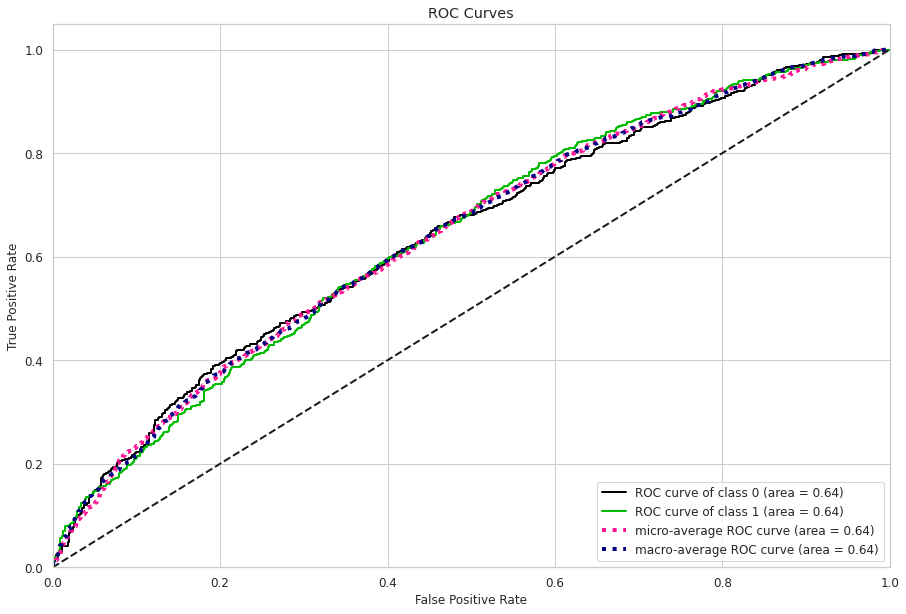

In [ ]:
import scikitplot as skplt
probs = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


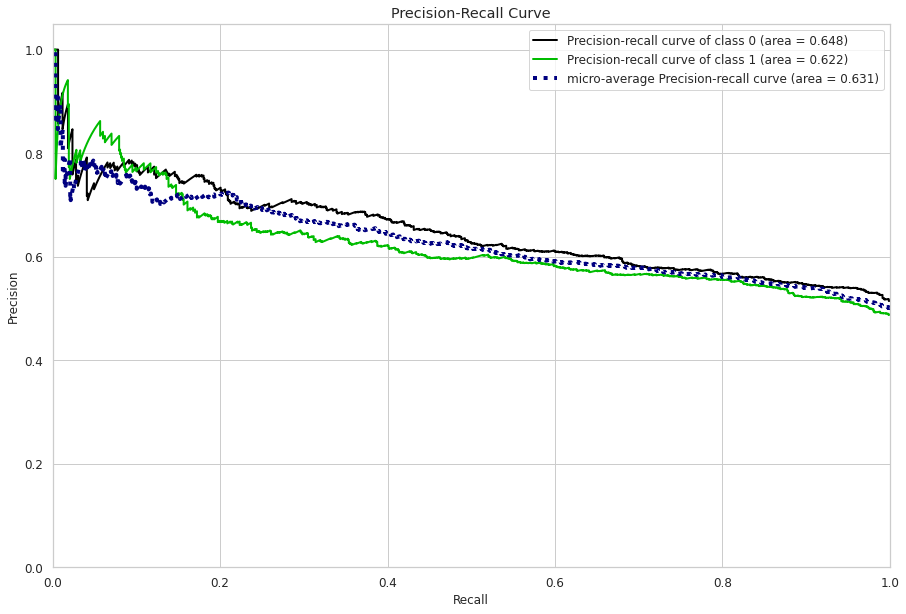

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, probs)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x720 with 0 Axes>

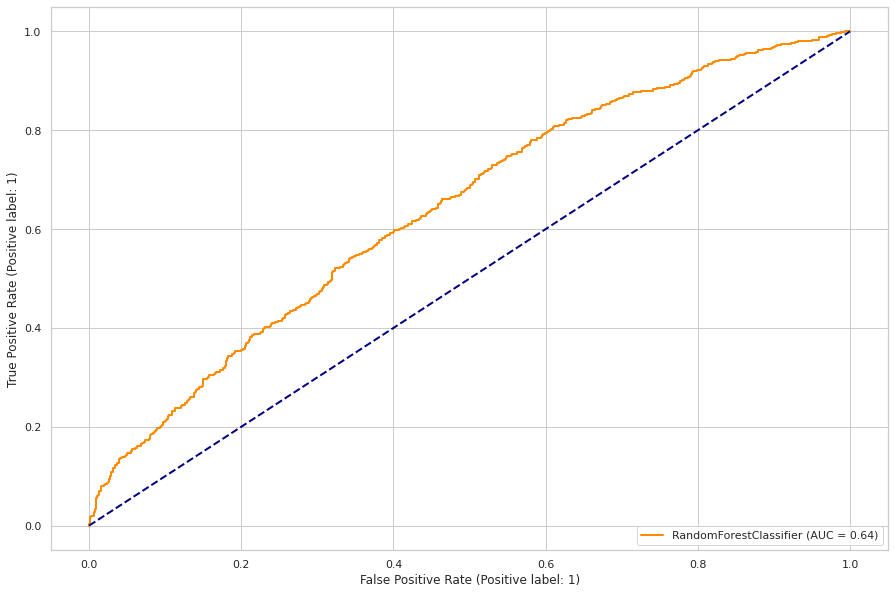

In [ ]:
plt.figure()
plot_roc_curve(rf,X_test,y_test,
               color="darkorange",
               lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.show()

In [ ]:
# feature importance
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head(20)

,feature,importance
1,handset_age,0.348031
11,1 / user_months,0.135153
24,handset_price * user_months,0.073127
25,phones_used * user_months,0.068317
19,user_months % handset_price,0.047264
22,handset_age * handset_price,0.043055
14,handset_age / handset_price,0.033022
13,cred_score / user_months,0.031455
9,CUM_MEAN(phones_used),0.024087
8,CUM_MEAN(handset_price),0.023831


In [ ]:
# SHAPELY model explainer
#!pip install shap
#import shap 

In [ ]:
# Create Tree Explainer object that can calculate shap values
#explainer = shap.TreeExplainer(rf)

In [ ]:
# sample
#choosen_instance = X_test.loc[[62173]]
#shap_values = explainer.shap_values(choosen_instance)
#shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
# sample
#shap.summary_plot(shap_values, X_train)

In [ ]:
# shap feature importance
#shap_values = shap.TreeExplainer(rf).shap_values(X_train)
#shap.summary_plot(shap_values, X_train, plot_type="bar")